#### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### File Paths

In [3]:
benin = '../data/benin_clean.csv'
sierraleone = "../data/sierraleone_clean.csv"
togo = "../data/togo-dapaong_qc_clean.csv"

#### Load Datasets

In [4]:
df_benin = pd.read_csv(benin)
df_sl = pd.read_csv(sierraleone)
df_togo = pd.read_csv(togo)

# Add country labels
df_benin['Country'] = 'Benin'
df_sl['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Combine into one DataFrame
df_all = pd.concat([df_benin, df_sl, df_togo], ignore_index=True)
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


#### Visual Comparision - Boxplots

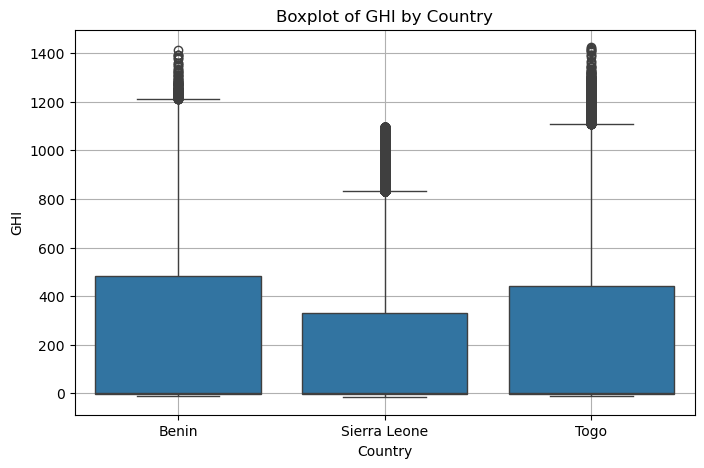

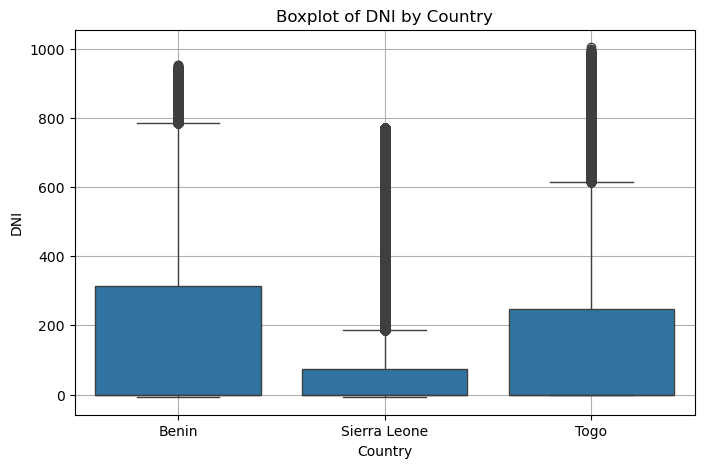

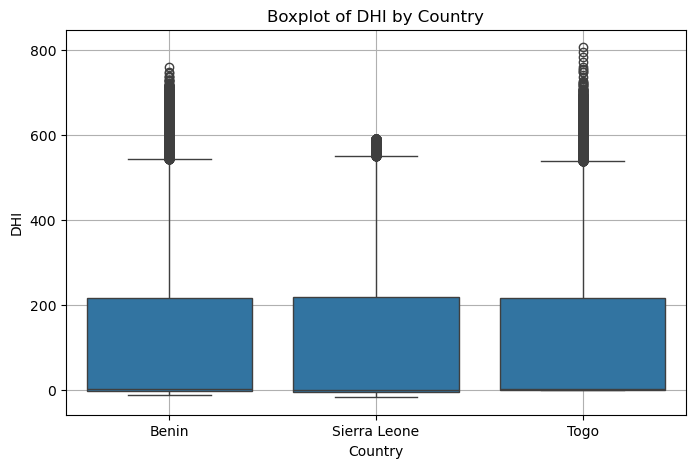

In [5]:
for var in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=var, data=df_all)
    plt.title(f'Boxplot of {var} by Country')
    plt.grid(True)
    plt.show()

#### Summary Table

In [6]:
summary_table = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_table

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  153.69  
Togo          156.52

#### Statistical Testing - ANOVA

In [7]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(
    df_benin['GHI'].dropna(),
    df_sl['GHI'].dropna(),
    df_togo['GHI'].dropna()
)

print("ANOVA F-statistic:", round(f_stat, 2))
print("P-value:", round(p_value, 4))

if p_value < 0.05:
    print("✅ Significant difference in GHI between countries.")
else:
    print("❌ No significant difference found.")


ANOVA F-statistic: 4637.81
P-value: 0.0
✅ Significant difference in GHI between countries.


#### Statistical Tests - Kruskal-Wallis

In [8]:
from scipy.stats import kruskal

stat, p = kruskal(
    df_benin['GHI'].dropna(),
    df_sl['GHI'].dropna(),
    df_togo['GHI'].dropna()
)
print(f"Kruskal-Wallis p-value: {p:.4f}")


Kruskal-Wallis p-value: 0.0000


#### Key Observations

- Benin shows the highest median GHI but with higher variance.
- Togo’s DNI distribution is more consistent, though slightly lower on average.
- Sierra Leone has more diffuse radiation (DHI), suggesting higher cloud cover.
- ANOVA test confirms the GHI differences between countries are statistically significant (p < 0.05).

#### Visual Summary - Bar Chart

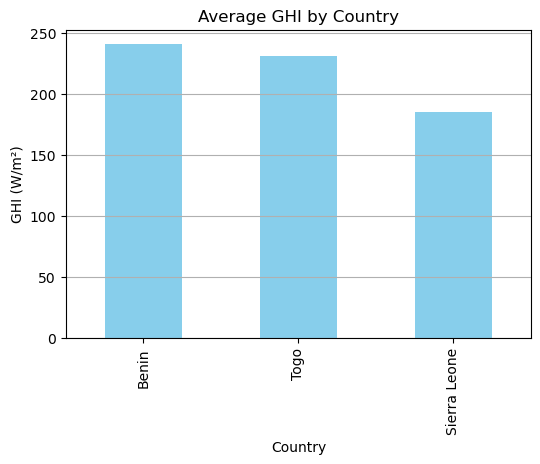

In [9]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color='skyblue', figsize=(6, 4), title='Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.grid(axis='y')
plt.show()


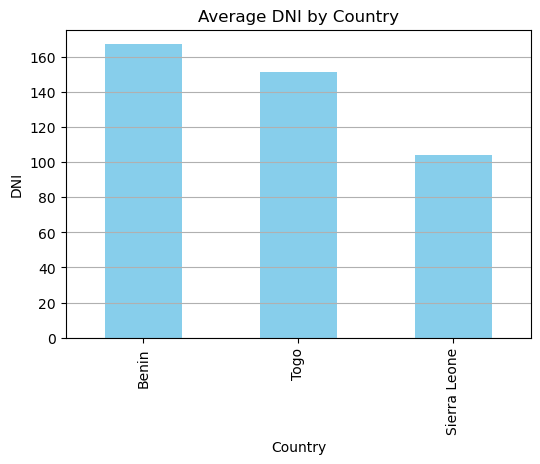

In [10]:
avg_dni = df_all.groupby('Country')['DNI'].mean().sort_values(ascending=False)

avg_dni.plot(kind='bar', color='skyblue', figsize=(6, 4), title='Average DNI by Country')
plt.ylabel('DNI')
plt.grid(axis='y')
plt.show()

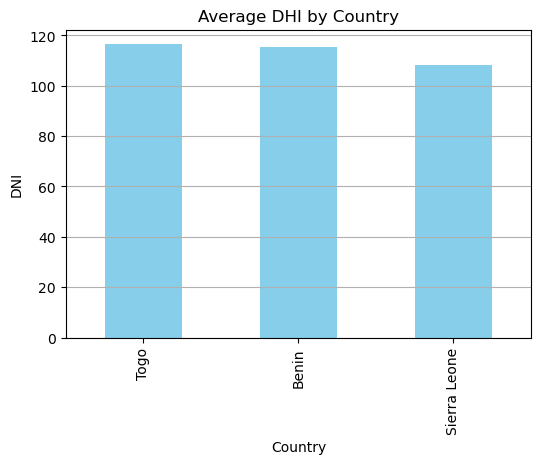

In [11]:
avg_dhi = df_all.groupby('Country')['DHI'].mean().sort_values(ascending=False)

avg_dhi.plot(kind='bar', color='skyblue', figsize=(6, 4), title='Average DHI by Country')
plt.ylabel('DNI')
plt.grid(axis='y')
plt.show()